# Measuring M-Lab

## GCP Projects - 6

* mlab-testing
* mlab-sandbox
* mlab-staging
* mlab-oti, measurement-lab, mlab-ns

## Cloud Services - 25+

* IAM - Service Accounts, Roles
* OAuth credentials
* AppEngine Standard + memcache & Flex + memstore
* Compute Engine (GCE) + disks, zones
* Kubernetes Engine (GKE) + configurations
* Google Cloud Storage (GCS)
* Cloud Functions
* Cloud Datastore
* VPC networks, firewalls, 
* Cloud DNS & LoadBalancers
* Cloud Builder
* Cloud Scheduler
* Cloud Pub/Sub
* Cloud Tasks
* BigQuery
* Cloud Logging
* Cloud Monitoring
* Stackdriver
* Google Container Registry
* Cloud Deployment Manager V2
* Cloud Identity-Aware Proxy
* Cloud Source Repositories
* Cloud Resource Manager
* Firebase


## Third-party Tools & Dependencies

* Linux kernel
* Prometheus & Grafana
* Kubernetes, Docker, Multus, 
* Package managers: apk, apt, npm, pip...


## Languages & Config Languages

* Go
* Javascript
* C & C++
* Python
* R
* JSONNET
* PromQL
* Bash, sed, awk
* Make 
* Cloud Build
* YAML
* TOML



In [259]:
%matplotlib inline

import os
import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import matplotlib.ticker
import datetime
import collections
import itertools
import csv

from scipy import stats

# Depends on: pip install sklearn
from sklearn.model_selection import train_test_split

# Some matplotlib features are version dependent.
assert(matplotlib.__version__ >= '2.1.2')

# Depends on: pip install --upgrade google-cloud-bigquery
from google.cloud import bigquery

import matplotlib.colors as mcolors

In [165]:
def readfile(name, fieldnames=["date", "repo", "language", "lines", "files"]):
    with open(name, newline='') as csvfile:
        reader = csv.DictReader(csvfile, fieldnames=fieldnames)
        results = collections.defaultdict(list)
        for row in reader:
            for key in row.keys():
                if key == 'date':
                    d = datetime.datetime.strptime(row[key], '%Y-%m-%d')
                    row[key] = d #.timestamp()
                if key in ['lines', 'files', 'total']:
                    row[key] = int(row[key])
                results[key].append(row[key])
    return pd.DataFrame(results)

# TOTAL REPOS

<AxesSubplot:xlabel='date'>

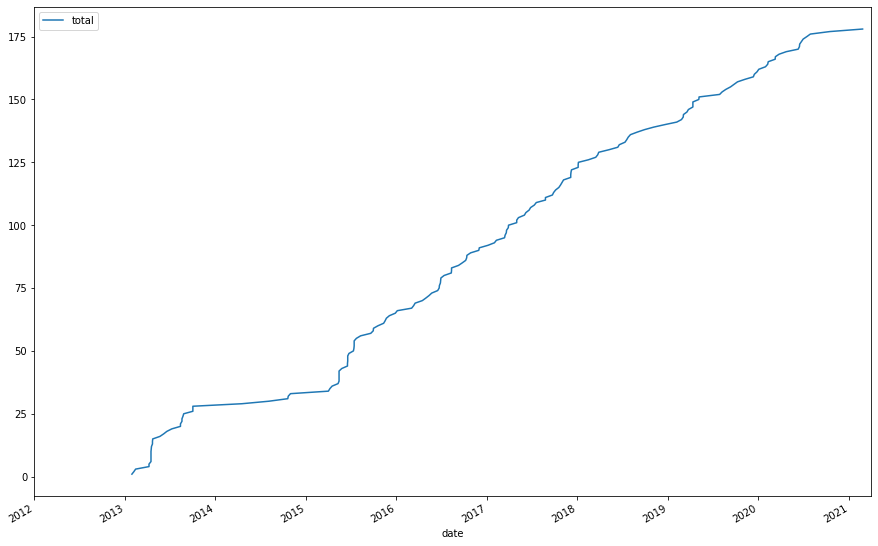

In [243]:
repos = readfile("total-repos.csv", fieldnames=["date", "total"])
repos.plot.line(x='date', y='total', figsize=(15,10),  xlim=('2012-01-01', '2021-04-01'))

# CLOC Caveats

* Does not recognize all Source files (e.g. jsonnet)

In [211]:
results = readfile("uniq.csv")
results

,date,repo,language,lines,files
0,2004-06-30,ndt.git,Bourne Shell,7472,9
1,2004-06-30,ndt.git,C Shell,9,1
2,2004-06-30,ndt.git,C,4661,11
3,2004-06-30,ndt.git,C/C++ Header,116,2
4,2004-06-30,ndt.git,HTML,615,4
...,...,...,...,...,...
1394827,2021-03-26,website.git,Markdown,11307,288
1394828,2021-03-26,website.git,Ruby,12,1
1394829,2021-03-26,website.git,SVG,4469,7
1394830,2021-03-26,website.git,Sass,7676,95


# TOTAL LINES (mostly)

* Excluding traceroute-caller & piecewise (high variance changes)

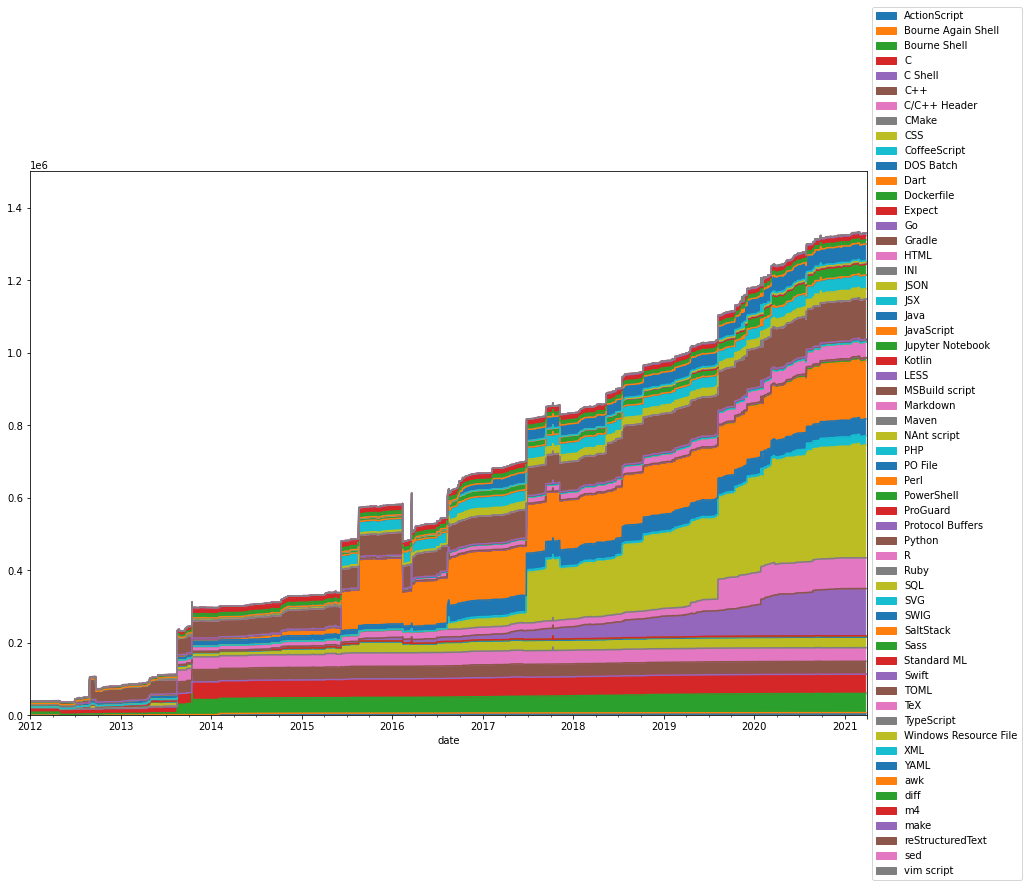

In [296]:
repos = ['traceroute-caller.git', 'piecewise.git'] # Exclude two repos with high variance changes.
show = results[~results['repo'].isin(repos)]
lang = pd.pivot_table(show, values='lines', index=['date'], columns=['language'], aggfunc=np.sum)
#lang = lang.drop(columns=["JSON"])
ax = lang.plot.area(figsize=(15,10), ylim=(0, 1.5e6), xlim=('2012-01-01', '2021-04-01'), stacked=True)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

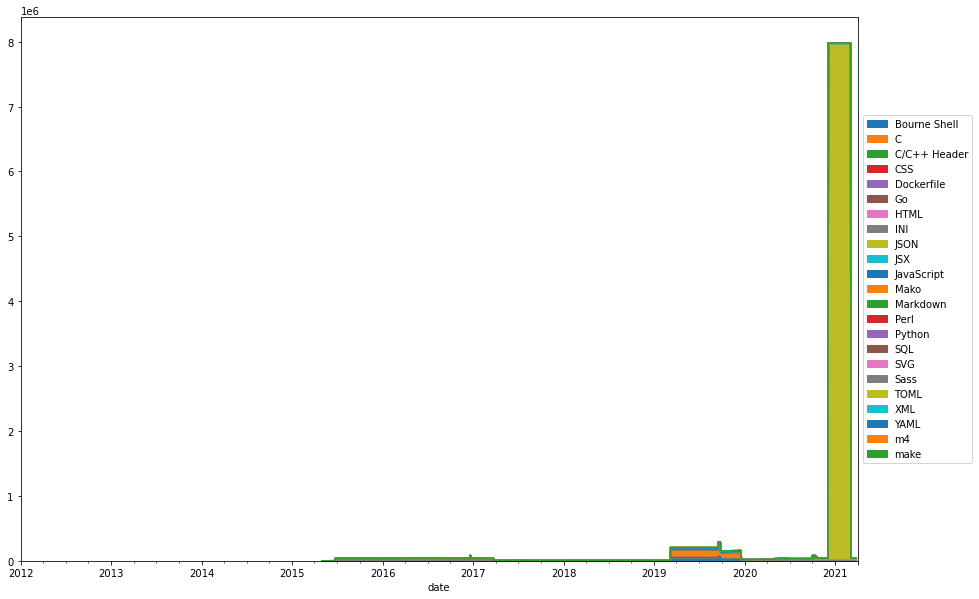

In [297]:
repos = ['traceroute-caller.git', 'piecewise.git'] # Exclude two repos with high variance changes.
show = results[results['repo'].isin(repos)]
lang = pd.pivot_table(show, values='lines', index=['date'], columns=['language'], aggfunc=np.sum)
ax = lang.plot.area(figsize=(15,10), xlim=('2012-01-01', '2021-04-01'), stacked=True)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# TOTAL FILES

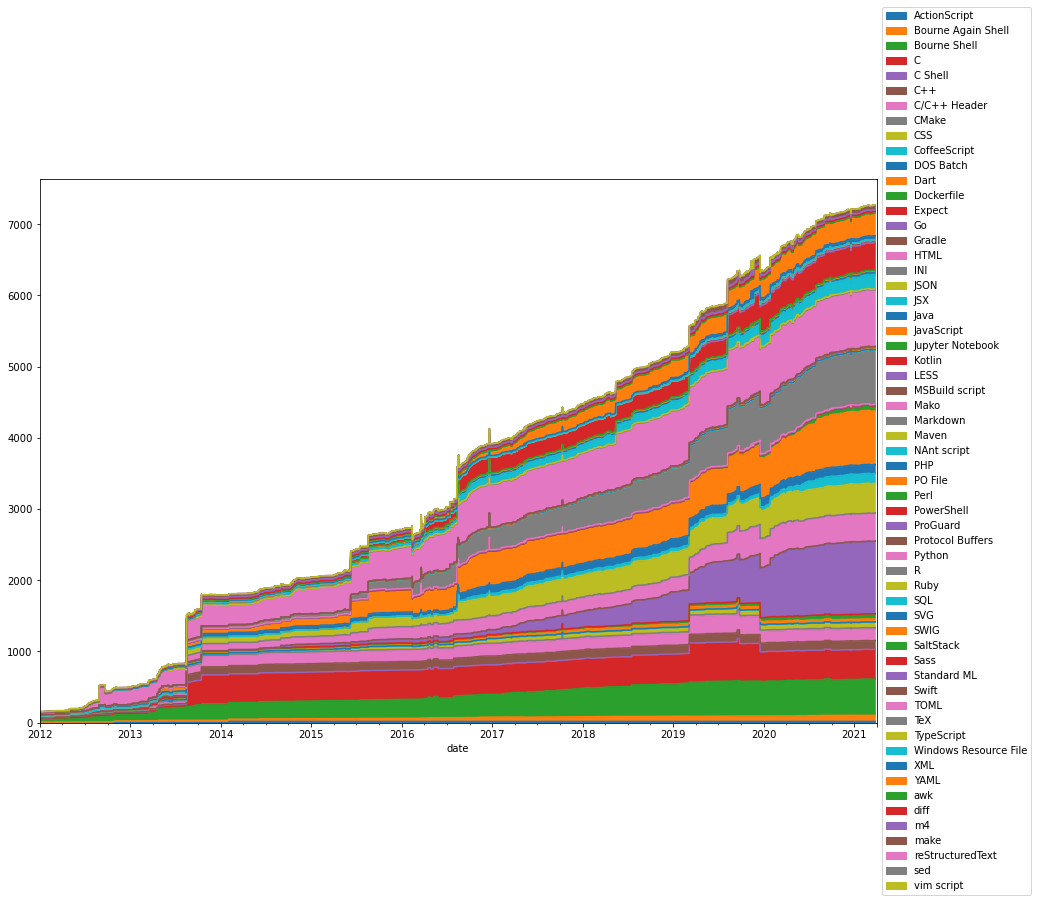

In [253]:
table = pd.pivot_table(results, values='files', index=['date'], columns=['language'], aggfunc=np.sum)
ax = table.plot.area(figsize=(15,10),  xlim=('2012-01-01', '2021-04-01'), stacked=True)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) #here is the magic

# LINES PER REPO

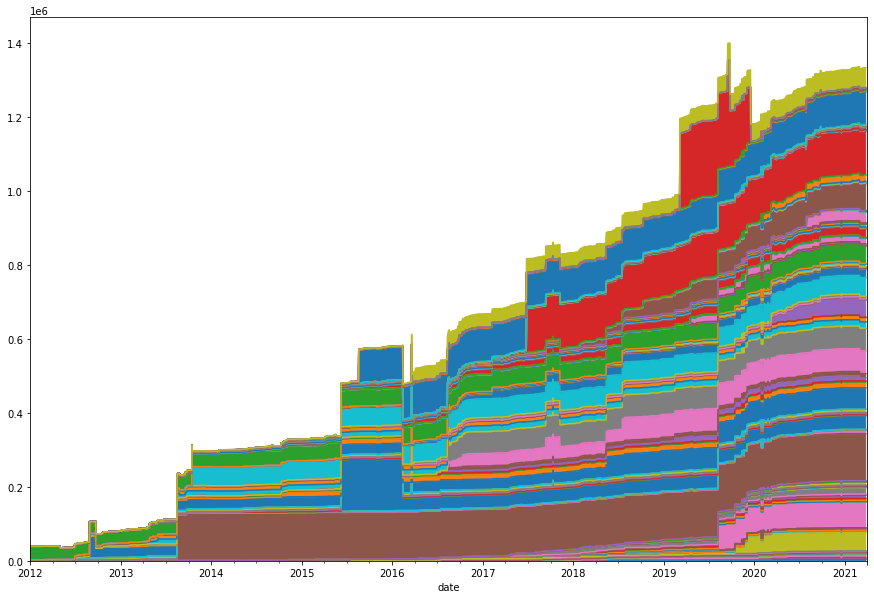

In [299]:
repos = ['piecewise.git'] #Exclude
show = results[~results['repo'].isin(repos)]
table = pd.pivot_table(show, values='lines', index=['date'], columns=['repo'], aggfunc=np.sum)
ax = table.plot.area(figsize=(15,10),  xlim=('2012-01-01', '2021-04-01'), stacked=True, legend=False)

# NDT7

* Excluding HTML

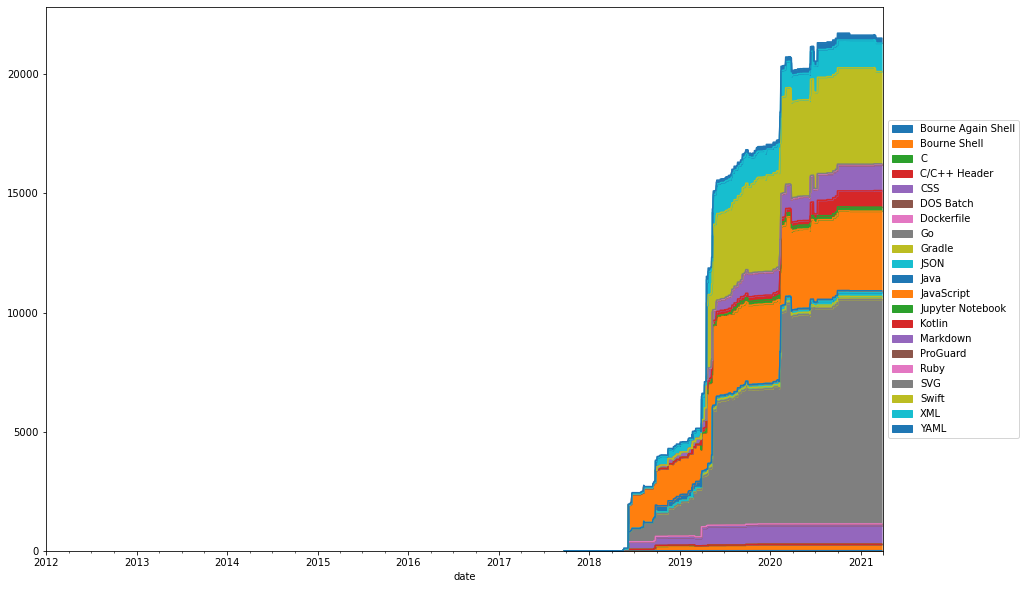

In [300]:
# allrepos = ['ndt-chrome-app.git', 'ndt-e2e-testmaster.git', 'ndt-probe-scheduler.git', 'ndt-support.git', 'ndt7-client-android.git', 'ndt7-js.git', 'ndt-debian.git', 'ndt-javascript-archive.git', 'ndt-raspi-prototype.git', 'ndt-ws-frontend.git', 'ndt7-client-go.git', 'ndt7.ipynb.git', 'ndt-e2e-ansible.git', 'ndt-javascript-client.git', 'ndt-server-go.git', 'ndt7-client-ios.git', 'ndt_js.git', 'ndt-e2e-clientworker.git', 'ndt-javascript.git', 'ndt-server.git', 'ndt5-client-go.git', 'ndt7-client-javascript.git', 'py-ndt.git']
repos = ['ndt-server.git', 'ndt7-client-android.git', 'ndt7-js.git', 'ndt7-client-go.git', 'ndt7.ipynb.git', 'ndt7-client-ios.git',  'ndt5-client-go.git', ]
show = results[results['repo'].isin(repos)]

ndtdf = pd.pivot_table(show, values='lines', index=['date'], columns=['language'], aggfunc=np.sum)
ndtdf = ndtdf.drop(columns=["HTML"])
ax = ndtdf.plot.area(figsize=(15,10),  xlim=('2012-01-01', '2021-04-01'), stacked=True)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Platform Services

* Excluding traceroute-caller

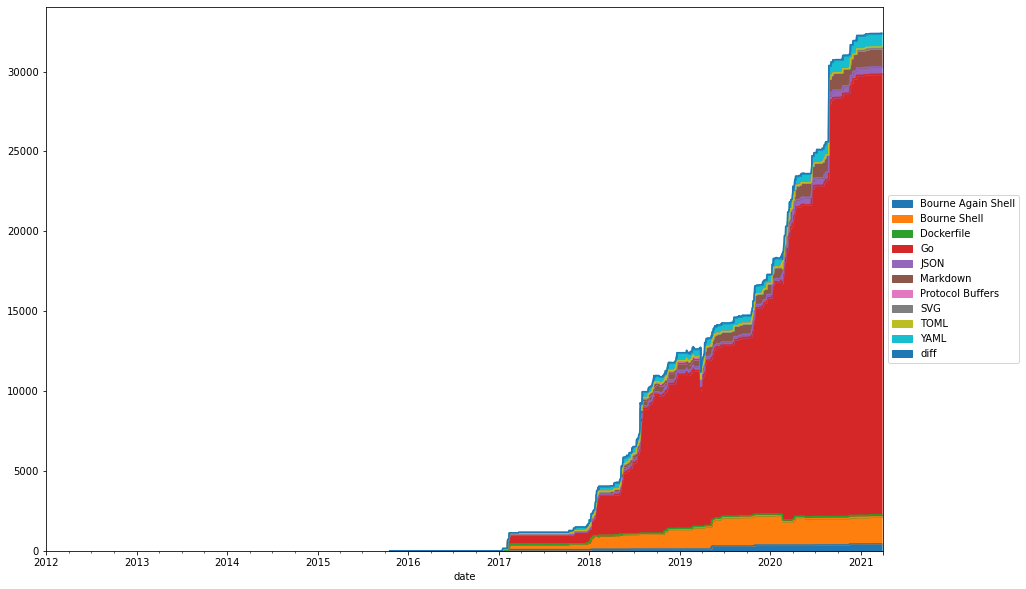

In [288]:
repos = ['pusher.git', 'uuid-annotator.git',  'disco.git','uuid.git', 'access.git', 'nodeinfo.git', 'index2ip.git', 'tcp-info.git', 'packet-headers.git', 'epoxy-extensions.git', 'epoxy-images.git', 'epoxy.git', 'locate.git', 'mlab-ns-rate-limit.git'] # , 'mlab-ns.git']
show = results[results['repo'].isin(repos)]

table = pd.pivot_table(show, values='lines', index=['date'], columns=['language'], aggfunc=np.sum)
ax = lang.plot.area(figsize=(15,10), xlim=('2012-01-01', '2021-04-01'), stacked=True)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Operations & Monitoring

* Excluding JSON

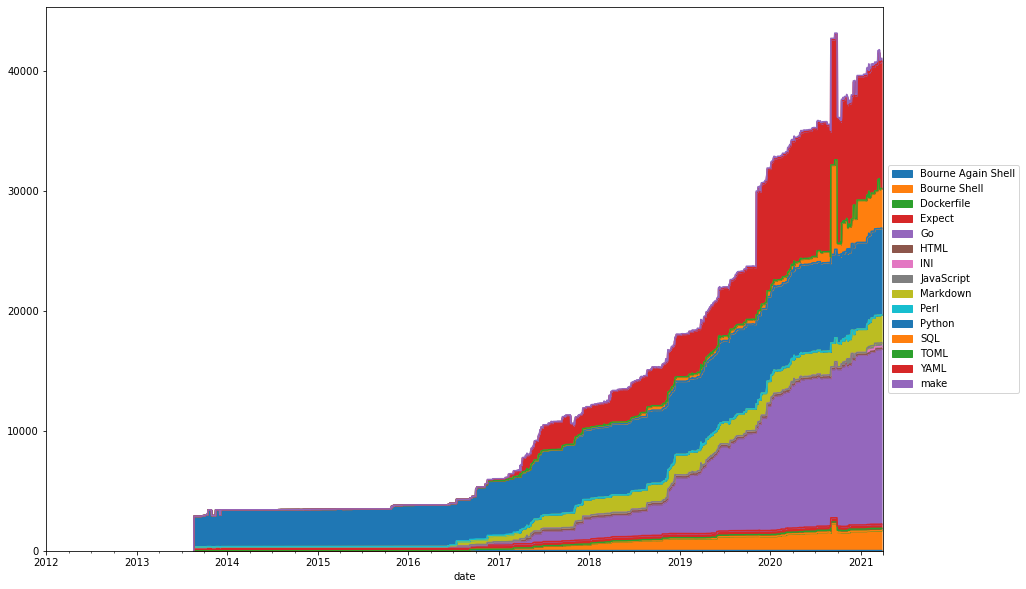

In [287]:
repos = ['alertmanager-github-receiver.git', 'bmctool.git', 'gcp-config.git', 'gcp-service-discovery.git', 'gcs-downloader.git', 'gcs-exporter.git', 'github-maintenance-exporter.git', 'operator.git', 'prometheus-bigquery-exporter.git', 'prometheus-nagios-exporter.git', 'prometheus-snmp-support.git', 'prometheus-support.git', 'reboot-service.git', 'rebot.git', 'script-exporter-support.git', 'script_exporter.git', 'siteinfo.git', 'smokeping-config.git', 'snmp-exporter-support.git', 'stats-pipeline.git', 'switch-config.git', 'switch-monitoring.git', 'operator.git']
show = results[results['repo'].isin(repos)]

opsdf = pd.pivot_table(show, values='lines', index=['date'], columns=['language'], aggfunc=np.sum)
opsdf = opsdf.drop(columns=["JSON"])
ax = opsdf.plot.area(figsize=(15,10), xlim=('2012-01-01', '2021-04-01'), stacked=True)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# ETL

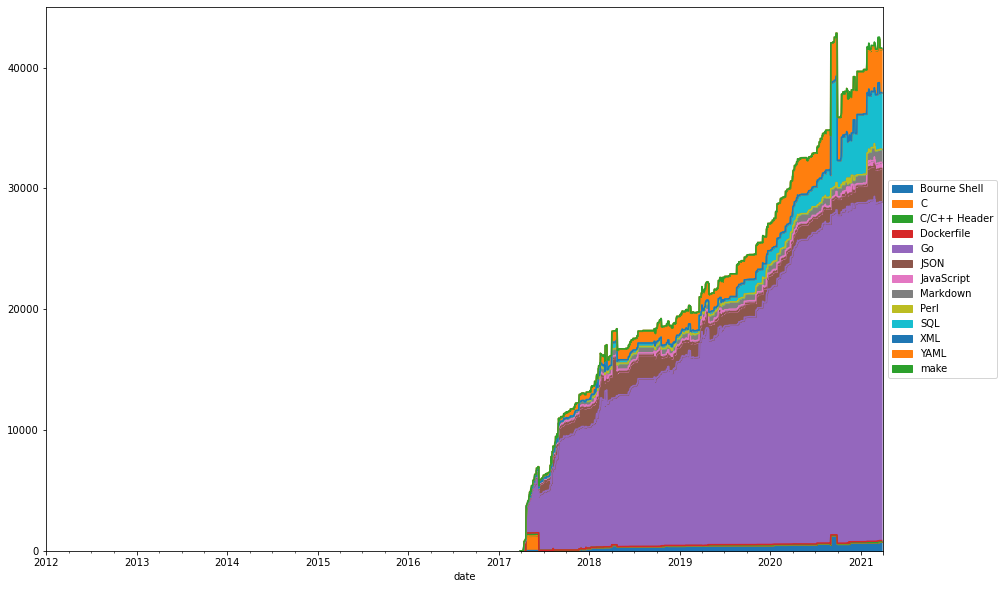

In [289]:
repos = ['etl.git', 'etl-gardener.git', 'etl-schema.git', 'annotation-service.git', 'etl-queue-pusher.git', 'downloader.git', 'stats-pipeline.git']
show = results[results['repo'].isin(repos)]

etldf = pd.pivot_table(show, values='lines', index=['date'], columns=['language'], aggfunc=np.sum)
ax = etldf.plot.area(figsize=(15,10),  xlim=('2012-01-01', '2021-04-01'), stacked=True)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Traceroute caller

* Excluding vendored C/make files

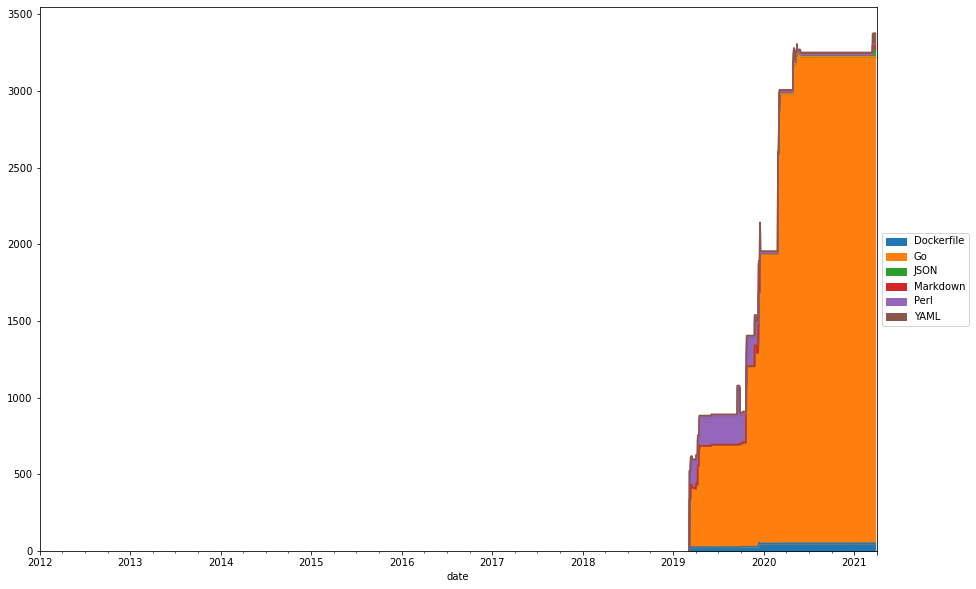

In [276]:
repos = ['traceroute-caller.git']
show = results[results['repo'].isin(repos)]

tcdf = pd.pivot_table(show, values='lines', index=['date'], columns=['language'], aggfunc=np.sum)
tcdf = tcdf.drop(columns=["Bourne Shell", "C", "C/C++ Header", "make", "m4"])
ax = tcdf.plot.area(figsize=(15,10),  xlim=('2012-01-01', '2021-04-01'), stacked=True)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Annotation Service

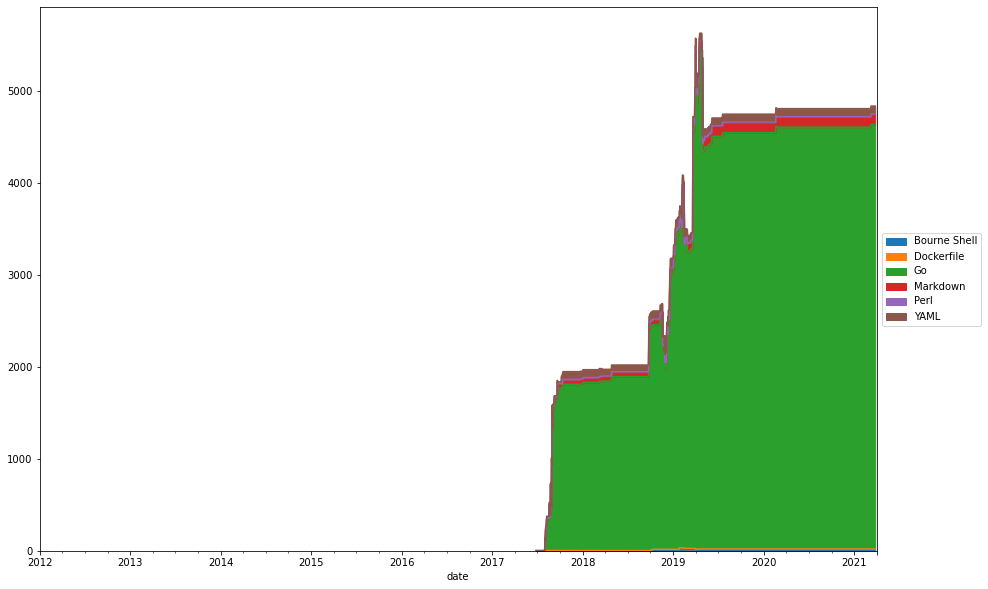

In [301]:
repos = ['annotation-service.git']
show = results[results['repo'].isin(repos)]

tcdf = pd.pivot_table(show, values='lines', index=['date'], columns=['language'], aggfunc=np.sum)
ax = tcdf.plot.area(figsize=(15,10),  xlim=('2012-01-01', '2021-04-01'), stacked=True)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))